# Input/Output

## Saving state of simulation

implementaion is based on [zarr](https://zarr.readthedocs.io/en/stable) library

100%|██████████| 100/100 [00:03<00:00, 26.37it/s]


/
 └── values (17, 17) int32

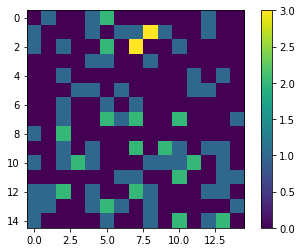

In [1]:
from SOC.models import BTW

a = BTW(15)
a.run(100)
a.plot_state()
root = a.save()
root.tree()

In [10]:
import zarr
read = zarr.open_group('state/sim.zarr', mode = 'r')
read.tree()

/
 └── values (17, 17) int32

In [11]:
read.attrs.keys()

dict_keys(['L', 'save_every'])

In [12]:
print(read.attrs['L'], " -  ", read.attrs['save_every'])

15 -100


## Values is empty array?

In [13]:
read['values'][:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

100%|██████████| 100/100 [00:00<00:00, 6334.66it/s]


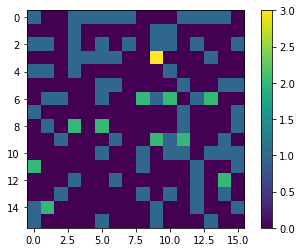

In [14]:
c = BTW(16)
c.run(100)
c.plot_state();

In [15]:
c.open('sim')

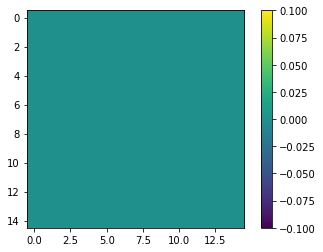

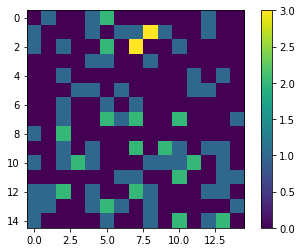

In [16]:
c.plot_state();
a.plot_state();

In [9]:
def save(self, file_name = 'sim'):
        """ serialization of object and saving it to file"""

        root = zarr.open_group('state/' + file_name + '.zarr', mode = 'w')
        values = root.create_dataset('values', shape = (self.L_with_boundary, self.L_with_boundary), chunks = (10, 10), dtype = 'i4')
        values = zarr.array(self.values)
        #data_acquisition = root.create_dataset('data_acquisition', shape = (len(self.data_acquisition)), chunks = (1000), dtype = 'i4')
        #data_acquisition = zarr.array(self.data_acquisition)
        root.attrs['L'] = self.L
        root.attrs['save_every'] = self.save_every

        return root

def open(self, file_name = 'sim'):
        root = zarr.open_group('state/' + file_name + '.zarr', mode = 'r')
        self.values = np.array(root['values'][:])
        self.data_acquisition = root['data_acquisition'][:]
        self.L = root.attrs['L']
        self.save_every = root.attrs['save_every']